# Reinforcement Learning



# I. Overview

**Reinforcement learning (RL)** is an area of machine learning concerned with how software agents ought to take actions in an environment in order to maximize the notion of cumulative reward. This workbook is about interesting field of machine learning which is Reinforcement Learning which resembles the human form of learning and based on reward funtion. When the series of actions end up with good results, we can reinforce those actions by giving some rewards. In this workbook, we will be implementing and learning reinforcement learning with 2D marble control problem and Mountain car problem.

We will be considering Temporal Difference learning approach for our implementation. Basically, there are two algorithms SARSA and Q-learning for the implementation, out of which we chose one of them which we will discuss later in our workbook.

# II. Problems 


## 2D Marble Control

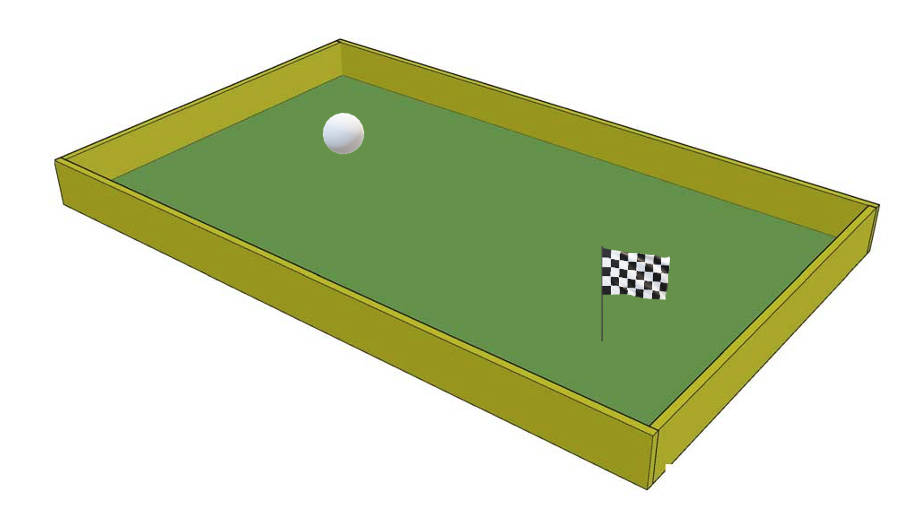


2D marble problem consists of a marble which runs into the hole through a series of actions. These actions are learnt by the model using Reinforcement learning, which means it receives reward on every step it moves away or towards the hole.



## 2D Marble Class

### Sample 2D Marble run Environment File

Reading in simple text file "marblerun.txt" with three characters, 'O', 'H', and 'G'.

'O': open space

'H': obstacles or boundaries of the table

'G': Goal location or hole

In [84]:
file = open("grid.txt")
line = file.read()
print(line)

OOOHOOOOO
OOOHOOHOO
OOOOOOHOO
OOOOHHHOO
OOHOOOOOH
OOHOOOGOO
OOOOOOOOO



## 2D Marble Explanation of problem and Class implementation

It contains four actions (left, right, up, and down) to move an agent towards the goal.In this 2D Marble control problem, if the marble reaches the goal (reaches hole in this case), it get 30 points of reward.If it falls moves out of the marble cross or hits the boundary of the marble cross table it gets -5.
Each marble step costs -1 point. 

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import defaultdict
import numpy as np
import collections
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sys
from copy import deepcopy as copy
%matplotlib inline

from util import Standardizer

In [128]:
# 2D Marble example

class Marble():
    def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G') #(5,6)

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
               grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        if isinstance(s, collections.Iterable) and len(s) == 2:
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
               return 'N'
            return self._map[tuple(s)].upper()
            print('Tuple',self._map[tuple(s)].upper())
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = self._s + self._actions[a]
        # state transition
        curr = self.check_state(s1)
        
        if curr == 'H' or curr == 'N':
            return -5
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5
        elif curr == 'G':
            self._s = s1
            return 30
        else:
            self._s = s1
            return -1
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
            
    def get_actions(self):
        return self._actions

## Explanation of codes

The marble 2D environment's main goal is to roll the ball into the goal position as shown in the figure above. 
- Action : move, there will be a second axis associated to it. 
- Step : right, left, up, down. 
- Goal position : (5,5). 
- The environment bounds are four end points of the board which the ball/marble is rolling on. 
- Assuming the goal width is 1 on each directions.
- Assuming the marble start position is [0, 0, 0, 0] which represents [x, dx, y, dy]
- The env.next() takes the action as arguents and return the rewards based on the next state and current state
- self._s is current state of the marble.
- self.get_current_state() will return the current state.
- self.get_size() will get the size of the state.
- self.get_actions() will return all the actions that the marble can take at given state.

In [129]:
#reading the grid from the text file which is the environment
env = Marble("marblerun.txt")
env.print_map()

[['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']
 ['H' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'H']
 ['H' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'H']
 ['H' 'O' 'O' 'O' 'G' 'O' 'O' 'O' 'H']
 ['H' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'H']
 ['H' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'H']
 ['H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']]


In [130]:
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

In [131]:
def policy_fn(epsilon, s, nA, Q):
    a = np.random.randint(nA)
    return a

## RL agent for 2D Marble Problem



In [132]:
class RLAgent: 
    """ 2D Marble Class environment

         To test this 2D Marble class, run the following sample codes:

            env = _2DMarble('sampledata.txt')

            env.print_map()
            print [2,3], env.check_state([2,3])
            print [0,0], env.check_state([0,0])
            print [3,4], env.check_state([3,4])
            print [10,3], env.check_state([10,3])

            env.init([0,0])
            print env.next(1)  # right
            print env.next(3)  # down
            print env.next(0)  # left
            print env.next(2)  # up

        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
    """
    
    def __init__(self, env):
        self.env = env
        self.size = env.get_size()
        self.n_a = len(env.get_actions())
        # self.Q table including the surrounding border
        self.Q = np.zeros((self.size[0], self.size[1], self.n_a))
        
    def epsilon_greed(self, epsilon, s):
        
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return np.argmax(self.Q[s[0],s[1]])
        pass
    
    def train(self, start, **params):
        
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 10) 
        maxstep= params.pop('maxstep', 50)
        
        # init self.Q matrix
        self.Q[...] = 0
        self.Q[self.env._map == 'H'] = -np.inf
        
        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        for j in range(maxiter):

            env.init(start)
            s = env.get_cur_state()
            # selects an action greedily based on the epsilon value
            a = self.epsilon_greed(epsilon, s)
        
            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # returns a reward based on the action
                r = env.next(a)
                s1 = env.get_cur_state() #gets the next state
                a1 = self.epsilon_greed(epsilon, s1)
                
                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size))) #traces the path to the goal from start

                # update self.Q table 
                self.Q[s[0], s[1], a] += alpha * (r + gamma * self.Q[s1[0], s1[1], a1] - self.Q[s[0], s[1],a])
                
                if env.is_goal(): # reached the goal
                    
                    #Once the goal is reached that position in the Q table is marked as 0 to indicate that the goal is reached
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1

            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, trace # last trace of trajectory

    def test(self, start, maxstep=1000):
        epsilon = 0
        
        #      Using the learned policy, generate the trajectory of 
        env.init(start)
        s = env.get_cur_state()
        # selection an action
        a = self.epsilon_greed(epsilon, s)
        
        rewards = []
        trace = np.array(coord_convert(s, self.size))
        # run simulation for max number of steps 
        for step in range(maxstep):
            # move
            r = env.next(a)
            s1 = env.get_cur_state()
            a1 = self.epsilon_greed(epsilon, s1)
                
            rewards.append(r)
            trace = np.vstack((trace, coord_convert(s1, self.size)))
            
            if env.is_goal(): # reached the goal
                
                self.Q[s1[0], s1[1], a1] = 0
                break

            s = s1
            a = a1
        return trace            

## Results with different hyperparamaters

In [133]:
### Plotting tools 

def plot_trace(agent, start, trace, title="test trajectory"):
    plt.plot(trace[:, 0], trace[:, 1], "ko-")
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.xlim([0, agent.size[1]])
    plt.ylim([0, agent.size[0]])

In [166]:
def plot_train(agent, rtrace, steps, trace, start):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(221)
    
    plt.plot(rtrace)    
    plt.ylabel("sum of rewards")

    ax1 = fig.add_subplot(222)
    
    plt.ylim([0,250])
    plt.plot(steps)   
    plt.ylabel("# steps")

    # contour plot for agent.Q
    #ax2 = fig.add_subplot(223)
    xs = range(agent.size[1])
    ys = range(agent.size[0])
    maxQ = np.max(agent.Q, axis=2)
    h_b = (maxQ==-np.inf)
    maxQ[h_b] = 0
    maxQ[h_b] = np.min(maxQ) - 100
    cs = plt.contourf(xs, ys[::-1], maxQ)
    plt.colorbar(cs)
    # plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    # plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.ylabel("max agent.Q")

    # plot traces
    # ax3 = fig.add_subplot(224)
    # plot_trace(agent, start, trace, "trace of the last episode")

    plt.plot()

In [167]:
# gamma = 0.99, alphx a=0.2, epsilon=0.1,
agent = RLAgent(env)
start = [1,1]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=1000, 
                                   maxstep=1000)

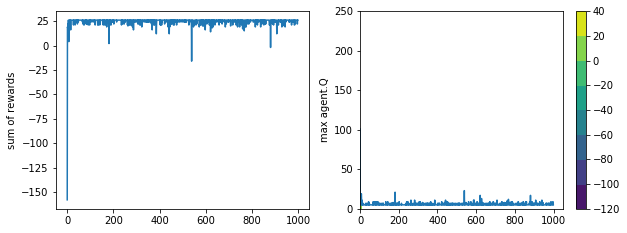

In [168]:
plot_train(agent, rtrace, steps, trace, start)

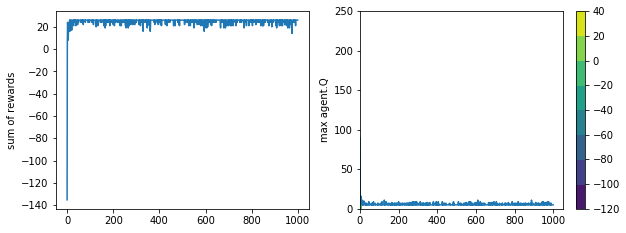

In [169]:
# gamma = 0.5, alpha=0.1, epsilon=0.2,
agent = RLAgent(env)
start = [1,1]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.5, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=1000, 
                                   maxstep=1000)
plot_train(agent, rtrace, steps, trace, start)

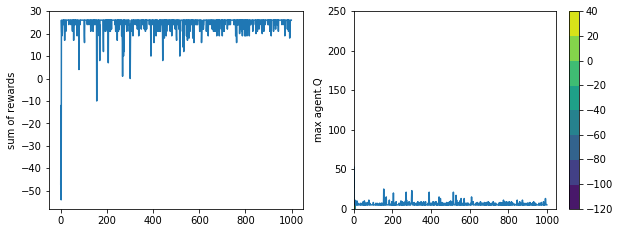

In [170]:
# gamma = 0.99, alpha=0.5, epsilon=0.3,
agent = RLAgent(env)
start = [1,1]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.5, 
                                   epsilon=0.1, 
                                   maxiter=1000, 
                                   maxstep=1000)
plot_train(agent, rtrace, steps, trace, start)

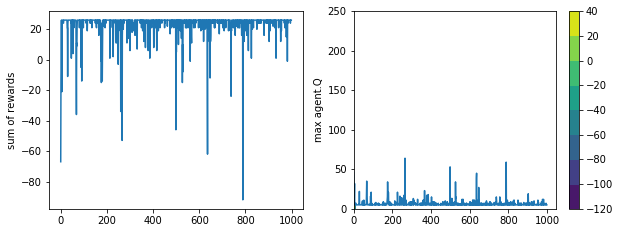

In [142]:
# gamma = 0.99, alpha=0.9, epsilon=0.4,
agent = RLAgent(env)
start = [1,1]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.9, 
                                   epsilon=0.1, 
                                   maxiter=1000, 
                                   maxstep=1000)
plot_train(agent, rtrace, steps, trace, start)

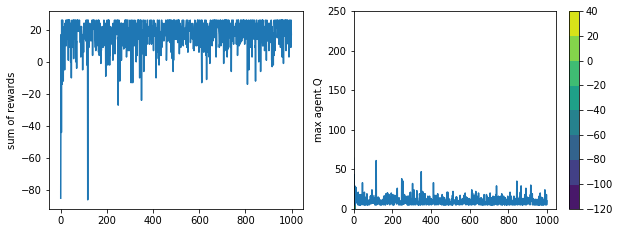

In [171]:
# gamma = 0.99, alpha=0.1, epsilon=0.6,
agent = RLAgent(env)
start = [1,1]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.5, 
                                   maxiter=1000, 
                                   maxstep=1000)
plot_train(agent, rtrace, steps, trace, start)

## Mountain Car

**Explanation of the problem**: 

Mountain Car environment has a small cart stuck in a trench. The cart needs to get to the flag on top of the crest to gain points and the faster it learns to do this, it gains more points. The cart can go left and right, with any variation of speed. Once the cart performs an action, the environment provides it a reward and tells it where the cart is at this point.This model basically learns to randomly perform actions until it recognizes the actions that give it a higher score.


<img src="https://gym.openai.com/videos/2019-10-21--mqt8Qj1mwo/MountainCarContinuous-v0/poster.jpg" data-video-type="video/mp4" data-video-source="https://gym.openai.com/videos/2019-10-21--mqt8Qj1mwo/MountainCarContinuous-v0/original.mp4">


## Mountain Car Class Implementation

### Specifying the Environment, and Explore the State and Action Spaces

We'll use OpenAI Gym environments to test and develop our algorithms. These simulate a variety of classic as well as contemporary reinforcement learning tasks. Let's use an environment that has a continuous state space, but a discrete action space. Let's use the following environment
Mountain Car problem in OpenAI gym: https://gym.openai.com/envs/MountainCar-v0/

In [3]:
import gym
from gym import logger as gymlogger
import numpy as np
import time
import pickle

In [4]:
#Declaring the variables for the class implementation
EPISODES = 1_000
LEARNING_RATE = 0.01
DISCOUNT = 0.95
epsilon = 0.5
decay = epsilon / ((EPISODES//2) - 1)

In [77]:
env = gym.make("MountainCar-v0")
observation = env.reset()
print(observation)
print(f"Size of the action space : {env.action_space.n}")
print(f"Range of observations : {env.observation_space.high} : {env.observation_space.low}")

[-0.56115804  0.        ]
Size of the action space : 3
Range of observations : [0.6  0.07] : [-1.2  -0.07]


Lets write a function to have just one episode and check the Mountain car class implementation.Please note that we can add env.render() to see what's going on behind the hood. But this makes the process very slow

In [78]:
def execute_once():
  done = False
  env.reset()
  while not done:
      action = 2
      new_state, reward, done, _ = env.step(action)
      print(reward, new_state)

execute_once()

-1.0 [-0.49566291  0.00079668]
-1.0 [-0.4940755   0.00158741]
-1.0 [-0.49170923  0.00236627]
-1.0 [-0.48858177  0.00312747]
-1.0 [-0.48471645  0.00386532]
-1.0 [-0.48014208  0.00457436]
-1.0 [-0.47489272  0.00524936]
-1.0 [-0.46900736  0.00588536]
-1.0 [-0.4625296   0.00647776]
-1.0 [-0.45550731  0.0070223 ]
-1.0 [-0.44799215  0.00751515]
-1.0 [-0.4400392   0.00795295]
-1.0 [-0.4317064  0.0083328]
-1.0 [-0.4230541  0.0086523]
-1.0 [-0.41414449  0.0089096 ]
-1.0 [-0.40504113  0.00910337]
-1.0 [-0.39580831  0.00923281]
-1.0 [-0.38651062  0.00929769]
-1.0 [-0.37721235  0.00929827]
-1.0 [-0.36797703  0.00923532]
-1.0 [-0.35886693  0.0091101 ]
-1.0 [-0.34994264  0.00892429]
-1.0 [-0.34126265  0.00867999]
-1.0 [-0.332883    0.00837965]
-1.0 [-0.32485694  0.00802606]
-1.0 [-0.31723469  0.00762225]
-1.0 [-0.31006319  0.00717151]
-1.0 [-0.30338588  0.0066773 ]
-1.0 [-0.29724263  0.00614325]
-1.0 [-0.29166955  0.00557308]
-1.0 [-0.28669895  0.0049706 ]
-1.0 [-0.28235926  0.00433969]
-1.0 [-0.278

Reward and the next state are displayed in the above Mountain car problem class implementation for one episode

# III. Methods

## Review of the SARSA and Q-Learning

When the number of states increases, the memory problem comes into picture. **Temporal Difference** helps us handle these problems. TD learning checks that agent learns only partial information of MDP. It keep track of the only of the current and next state and it let the agent explore the enviroment randomly, with the value function:

$$ V(s_t) = R_{t+1} + \gamma V(s_{t+1})$$

So, temoral difference Error:
$$ \delta_t= R_{t+1} + \gamma V(s_{t+1}) - V(s_t)$$

This error can be further be used to estimate the gradient to update the value estimation:
$$ 
\delta_t \leftarrow R_{t+1} + \alpha \delta_t 
$$

We define Q function to evaluate state and action together. So we follow two different algorithms for updating the Q-table:    
**1. SARSA** (on-policy control)  

In **SARSA**, we use the action that is taken in previous state.
First we update Q with certain assumption and follow a certain behavior policy. This, it is called on-policy control. Given below is the formula used to update Q in SARSA

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) 
$$

**2. Q-learning** (off-policy control)

In **Q-learning** algorithm, if we start at state 1, perform some action and get some reward, and then look what is the maximum reward for an action is in state 2, and uses it to update action value of performing the action 1 in the state 1.

In Q-learning, we do not make any king of assumption in behavior policy and explore other possiblle policies to update the table. Thus this is called as off-policy control. Given below is the formula used to update Q in Q-learning

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) 
$$

The primary difference in Q-learning is that it uses the action with maximum reward to update the action value.

Below are the psedocodes for each algorithm. 

**[Algorithm: SARSA]**
![](http://incompleteideas.net/book/ebook/pseudotmp8.png)


**[Algorithm: Q-learning]**
![](http://incompleteideas.net/book/ebook/pseudotmp9.png)


## Choice of TD learning and Reason

There is not much difference between the two learning algorithms i.e SARSA and Q-learning. The only difference between the two is that Q-learning simply select one with maximum Q value, a kind of Greedy approach. We will follow Q-learning approach for our problem in order to maximizing the reward. Since we have only 2 possible actions for our problem so there would not be any computational problem.  
Although there is a little problem with even this approach is that greedy selection will repeat the same actions or we can say that it repeatedly exploit our current knowledge.  


This is called **Exploration-Exploitation** problem.  
1. Exploration: This approach is abot exploring number of states and actions in the environment.
2. Exploitation: While on the other hand this approach is continiously selecting our actions to greddily to maximize the rewards.

We have to amintain a tradeoff between the two and we select our action based on $\epsilon$-greedy action selection. we can conytrol these parameters between $\epsilon \in [0,1]$. $\epsilon$=0 means the action is selected in greedy manner while $\epsilon$=1 means action is selected randomly.   
We will maintain a kind of tradeoff between these 2.

## Choice of Function Approximation and Reason

Q-learning can be combined with function approximation. This makes it possible to apply the algorithm to larger problems, even when the state space is continuous. Here are the two famous action-value function approximation functions:

* Linear Value
* Neural Network

I have chosen *Linear Value Function approximation* as it is a differentiable function approximator and converges to global optimum.  It lets us assign values to states s, which can then be used to determine optimal policies. The performance of Value Iteration with function approximation is going to depend almost entirely on the quality of the features (along with the function representation, i.e. linear, neural network, etc.)

For state transition from $i$ to $j$ with action $k$
$$ V^{n+1} (s_i) = \max_k \Big[ R_i + \gamma \sum_{j=1}^N P^k_{ij} V^n (s_j) \Big] $$

With an estiate of the value function $V(s)$, $\hat{V}(s)$, 

   $$ 
        \begin{align}
        \Rightarrow \quad \delta_t &= R_{t+1} + \gamma \hat{V}(s_{t+1}) - V(s_t).
        \end{align}
    $$
    
We can use this error as a gradient to update the value estimation.

$$
    \begin{align}
        V(s_t) &\leftarrow R_{t+1} + \alpha (R_{t+1} + \gamma \hat{V}(s_{t+1}) - V(s_t))
    \end{align}
$$

Without making assumption of behavior policy, we can explore other possible policies to update the Q.

$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) 
$$

Picking an action can be simple by selecting one with maximum Q value, so Greedy!. 

$$
a^* = \arg \max_a Q(S_t, a)
$$

## RL Agent for Mountain Car Problem using Q-Learning

### Discretize the State Space with a Uniform Grid
We will discretize the space using a uniformly-spaced grid. Implement the following function to create such a grid, given the lower bounds (low), upper bounds (high), and number of desired bins along each dimension. It should return the split points for each dimension, which will be 1 less than the number of bins.

For instance, if low = [-1.0, -5.0], high = [1.0, 5.0], and bins = (10, 10), then your function should return the following list of 2 NumPy arrays:

[array([-0.8, -0.6, -0.4, -0.2,  0.0,  0.2,  0.4,  0.6,  0.8]),
 array([-4.0, -3.0, -2.0, -1.0,  0.0,  1.0,  2.0,  3.0,  4.0])]
Note that the ends of low and high are not included in these split points. It is assumed that any value below the lowest split point maps to index 0 and any value above the highest split point maps to index n-1, where n is the number of bins along that dimension.

In [74]:
def create_uniform_grid(low, high, bins=(10, 10)):
    """Define a uniformly-spaced grid that can be used to discretize a space.
    
    Parameters
    ----------
    low : array_like
        Lower bounds for each dimension of the continuous space.
    high : array_like
        Upper bounds for each dimension of the continuous space.
    bins : tuple
        Number of bins along each corresponding dimension.
    
    Returns
    -------
    grid : list of array_like
        A list of arrays containing split points for each dimension.
    """
    
    x_grid_len = (high[0] - low[0])/(bins[0]*1.0)
    y_grid_len = (high[1] - low[1])/(bins[1]*1.0)
    x_grid = [low[0]+i*x_grid_len for i in range(1, bins[0])]
    y_grid = [low[1]+i*y_grid_len for i in range(1, bins[1])]
    
    return [np.array(x_grid), np.array(y_grid)]


low = [-1.0, -5.0]
high = [1.0, 5.0]
create_uniform_grid(low, high)  # [test]

[array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]),
 array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])]

In [75]:
def discretize(sample, grid):
    """Discretize a sample as per given grid.
    
    Parameters
    ----------
    sample : array_like
        A single sample from the (original) continuous space.
    grid : list of array_like
        A list of arrays containing split points for each dimension.
    
    Returns
    -------
    discretized_sample : array_like
        A sequence of integers with the same number of dimensions as sample.
    """
    
    x = np.digitize(np.array([sample[0]]), grid[0], right=False)
    y = np.digitize(np.array([sample[1]]), grid[1], right=False)
    return [x[0], y[0]]


# Test with a simple grid and some samples
grid = create_uniform_grid([-1.0, -5.0], [1.0, 5.0])
print('grid: {}'.format(grid))
samples = np.array(
    [[-1.0 , -5.0],
     [-0.81, -4.1],
     [-0.8 , -4.0],
     [-0.5 ,  0.0],
     [ 0.2 , -1.9],
     [ 0.8 ,  4.0],
     [ 0.81,  4.1],
     [ 1.0 ,  5.0]])
discretized_samples = np.array([discretize(sample, grid) for sample in samples])
print("\nSamples:", repr(samples), sep="\n")
print("\nDiscretized samples:", repr(discretized_samples), sep="\n")


grid: [array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]), array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])]

Samples:
array([[-1.  , -5.  ],
       [-0.81, -4.1 ],
       [-0.8 , -4.  ],
       [-0.5 ,  0.  ],
       [ 0.2 , -1.9 ],
       [ 0.8 ,  4.  ],
       [ 0.81,  4.1 ],
       [ 1.  ,  5.  ]])

Discretized samples:
array([[0, 0],
       [0, 0],
       [1, 1],
       [2, 5],
       [5, 3],
       [9, 9],
       [9, 9],
       [9, 9]])


In [79]:
# Create a grid to discretize the state space
state_grid = create_uniform_grid(env.observation_space.low, env.observation_space.high, bins=(10, 10))
state_grid

[array([-1.02000004, -0.84000003, -0.66000003, -0.48000002, -0.30000001,
        -0.12      ,  0.06      ,  0.24000001,  0.42000002]),
 array([-0.056, -0.042, -0.028, -0.014,  0.   ,  0.014,  0.028,  0.042,
         0.056])]

Provided below is a simple Q-Learning agent. Implementing the preprocess_state() method to convert each continuous state sample to its corresponding discretized representation.

In [80]:
class QLearningAgent:
    """Q-Learning agent that can act on a continuous state space by discretizing it."""

    def __init__(self, env, state_grid, alpha=0.02, gamma=0.99,
                 epsilon=1.0, epsilon_decay_rate=0.9995, min_epsilon=.01, seed=505):
        """Initialize variables, create grid for discretization."""
        # Environment info
        self.env = env
        self.state_grid = state_grid
        self.state_size = tuple(len(splits) + 1 for splits in self.state_grid)  # n-dimensional state space
        self.action_size = self.env.action_space.n  # 1-dimensional discrete action space
        self.seed = np.random.seed(seed)
        print("Environment:", self.env)
        print("State space size:", self.state_size)
        print("Action space size:", self.action_size)
        
        # Learning parameters
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount factor
        self.epsilon = self.initial_epsilon = epsilon  # initial exploration rate
        self.epsilon_decay_rate = epsilon_decay_rate # how quickly should we decrease epsilon
        self.min_epsilon = min_epsilon
        
        # Create Q-table
        self.q_table = np.zeros(shape=(self.state_size + (self.action_size,)))
        print("Q table size:", self.q_table.shape)

    def preprocess_state(self, state):
        """Map a continuous state to its discretized representation."""
        return tuple(discretize(state, self.state_grid))

    def reset_episode(self, state):
        """Reset variables for a new episode."""
        # Gradually decrease exploration rate
        self.epsilon *= self.epsilon_decay_rate
        self.epsilon = max(self.epsilon, self.min_epsilon)

        # Decide initial action
        self.last_state = self.preprocess_state(state)
        self.last_action = np.argmax(self.q_table[self.last_state])
        return self.last_action
    
    def reset_exploration(self, epsilon=None):
        """Reset exploration rate used when training."""
        self.epsilon = epsilon if epsilon is not None else self.initial_epsilon

    def act(self, state, reward=None, done=None, mode='train'):
        """Pick next action and update internal Q table (when mode != 'test')."""
        state = self.preprocess_state(state)
        if mode == 'test':
            # Test mode: Simply produce an action
            action = np.argmax(self.q_table[state])
        else:
            # Train mode (default): Update Q table, pick next action
            # Note: We update the Q table entry for the *last* (state, action) pair with current state, reward
            self.q_table[self.last_state + (self.last_action,)] += self.alpha * \
                (reward + self.gamma * max(self.q_table[state]) - self.q_table[self.last_state + (self.last_action,)])

            # Exploration vs. exploitation
            do_exploration = np.random.uniform(0, 1) < self.epsilon
            if do_exploration:
                # Pick a random action
                action = np.random.randint(0, self.action_size)
            else:
                # Pick the best action from Q table
                action = np.argmax(self.q_table[state])

        # Roll over current state, action for next step
        self.last_state = state
        self.last_action = action
        return action

In [81]:
q_agent = QLearningAgent(env, state_grid)

Environment: <TimeLimit<MountainCarEnv<MountainCar-v0>>>
State space size: (10, 10)
Action space size: 3
Q table size: (10, 10, 3)


In [82]:
def run(agent, env, num_episodes=10000, mode='train'):
    """Run agent in given reinforcement learning environment and return scores."""
    scores = []
    max_avg_score = -np.inf
    for i_episode in range(1, num_episodes+1):
        # Initialize episode
        state = env.reset()
        action = agent.reset_episode(state)
        total_reward = 0
        done = False

        # Roll out steps until done
        while not done:
            state, reward, done, info = env.step(action)
            total_reward += reward
            action = agent.act(state, reward, done, mode)

        # Save final score
        scores.append(total_reward)
        
        # Print episode stats
        if mode == 'train':
            if len(scores) > 100:
                avg_score = np.mean(scores[-100:])
                if avg_score > max_avg_score:
                    max_avg_score = avg_score

            if i_episode % 100 == 0:
                print("\rEpisode {}/{} | Max Average Score: {}".format(i_episode, num_episodes, max_avg_score), end="")
                sys.stdout.flush()

    return scores

In [83]:
scores = run(q_agent, env)

Episode 10000/10000 | Max Average Score: -145.49

## Explanation of codes

**Class QLearningAgent:** This method creates an agent with various parameters.

**_init_:** This method initializes the parameters

**preprocess_state:** This method is used to identify the state the agent is in.

**reset_episode:** This method is used to reset number of episodes.

**reset_exploration:** This method is used to reset the epsilon value.

**act:** This method is used for creating action.

**run:** This method is used for running an agent in RL environment in train mode


# Results

## Experimental Output for parameter selection and Output Plots

### Visualization of Alpha Vs Scores

Environment: <TimeLimit<MountainCarEnv<MountainCar-v0>>>
State space size: (10, 10)
Action space size: 3
Q table size: (10, 10, 3)
Episode 10000/10000 | Max Average Score: -197.42[TEST] Completed 100 episodes with avg. score = -200.0
Alpha: 0.001	Max avg Score: -200.0
Environment: <TimeLimit<MountainCarEnv<MountainCar-v0>>>
State space size: (10, 10)
Action space size: 3
Q table size: (10, 10, 3)
Episode 10000/10000 | Max Average Score: -157.99[TEST] Completed 100 episodes with avg. score = -164.13
Alpha: 0.01	Max avg Score: -164.13
Environment: <TimeLimit<MountainCarEnv<MountainCar-v0>>>
State space size: (10, 10)
Action space size: 3
Q table size: (10, 10, 3)
Episode 10000/10000 | Max Average Score: -149.16[TEST] Completed 100 episodes with avg. score = -174.49
Alpha: 0.02	Max avg Score: -174.49
Environment: <TimeLimit<MountainCarEnv<MountainCar-v0>>>
State space size: (10, 10)
Action space size: 3
Q table size: (10, 10, 3)
Episode 10000/10000 | Max Average Score: -141.18[TEST] Compl

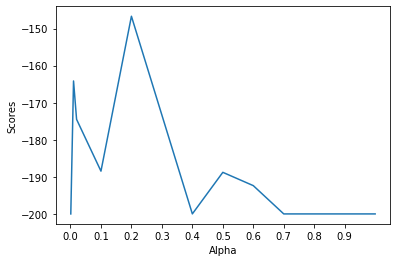

In [48]:
no_of_cases = [0.001,0.01,0.02,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1]
test_scores_alphas = []
alpha =[]
for i in range(len(no_of_cases)):
    q_agent_alpha = QLearningAgent(env, state_grid,alpha=no_of_cases[i])
    scores_alpha = run(q_agent_alpha,env,num_episodes=10000) 
    test_scores_alpha = run(q_agent_alpha, env, num_episodes=100, mode='test')
    test_scores_alphas.append(np.mean(test_scores_alpha))
    alpha.append(no_of_cases[i])
    print("[TEST] Completed {} episodes with avg. score = {}".format(len(test_scores_alpha), np.mean(test_scores_alpha)))
    print("Alpha: "+str(no_of_cases[i])+"\tMax avg Score: "+ str(np.mean(test_scores_alpha)))

plt.plot(alpha,test_scores_alphas)
plt.xticks(np.arange(0, 1, 0.1))
plt.xlabel("Alpha")
plt.ylabel("Scores")
plt.show()

Environment: <TimeLimit<MountainCarEnv<MountainCar-v0>>>
State space size: (10, 10)
Action space size: 3
Q table size: (10, 10, 3)
Episode 10000/10000 | Max Average Score: -147.87[TEST] Completed 100 episodes with avg. score = -179.27
Epsilon: 0	Max avg Score: -179.27
Environment: <TimeLimit<MountainCarEnv<MountainCar-v0>>>
State space size: (10, 10)
Action space size: 3
Q table size: (10, 10, 3)
Episode 10000/10000 | Max Average Score: -147.29[TEST] Completed 100 episodes with avg. score = -148.59
Epsilon: 0.2	Max avg Score: -148.59
Environment: <TimeLimit<MountainCarEnv<MountainCar-v0>>>
State space size: (10, 10)
Action space size: 3
Q table size: (10, 10, 3)
Episode 10000/10000 | Max Average Score: -153.85[TEST] Completed 100 episodes with avg. score = -170.25
Epsilon: 0.4	Max avg Score: -170.25
Environment: <TimeLimit<MountainCarEnv<MountainCar-v0>>>
State space size: (10, 10)
Action space size: 3
Q table size: (10, 10, 3)
Episode 10000/10000 | Max Average Score: -144.13[TEST] Com

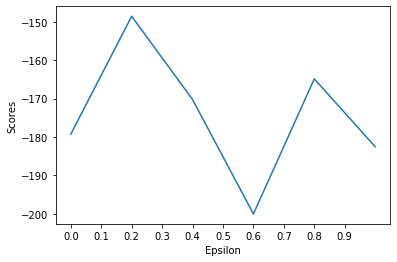

In [51]:
no_of_cases = [0,0.2,0.4,0.6,0.8,1]
test_scores_epsilons = []
epsilon = []

for i in range(len(no_of_cases)):
    q_agent_epsilon = QLearningAgent(env, state_grid,epsilon=no_of_cases[i])
    scores_epsilon = run(q_agent_epsilon,env,num_episodes=10000) 
    test_scores_epsilon = run(q_agent_epsilon, env, num_episodes=100, mode='test')
    print("[TEST] Completed {} episodes with avg. score = {}".format(len(test_scores_epsilon), np.mean(test_scores_epsilon)))
    test_scores_epsilons.append(np.mean(test_scores_epsilon))
    epsilon.append(no_of_cases[i])
    print("Epsilon: "+str(no_of_cases[i])+"\tMax avg Score: "+str(np.mean(test_scores_epsilon)))

plt.plot(epsilon,test_scores_epsilons)
plt.xticks(np.arange(0, 1, 0.1))
plt.xlabel("Epsilon")
plt.ylabel("Scores")
plt.show()

Environment: <TimeLimit<MountainCarEnv<MountainCar-v0>>>
State space size: (10, 10)
Action space size: 3
Q table size: (10, 10, 3)
Episode 10000/10000 | Max Average Score: -153.44/n[TEST] Completed 100 episodes with avg. score = -200.0
Gamma: 0.1	Max avg Score: -200.0
Environment: <TimeLimit<MountainCarEnv<MountainCar-v0>>>
State space size: (10, 10)
Action space size: 3
Q table size: (10, 10, 3)
Episode 10000/10000 | Max Average Score: -148.42/n[TEST] Completed 100 episodes with avg. score = -145.16
Gamma: 0.2	Max avg Score: -145.16
Environment: <TimeLimit<MountainCarEnv<MountainCar-v0>>>
State space size: (10, 10)
Action space size: 3
Q table size: (10, 10, 3)
Episode 10000/10000 | Max Average Score: -151.2/n[TEST] Completed 100 episodes with avg. score = -200.0
Gamma: 0.4	Max avg Score: -200.0
Environment: <TimeLimit<MountainCarEnv<MountainCar-v0>>>
State space size: (10, 10)
Action space size: 3
Q table size: (10, 10, 3)
Episode 10000/10000 | Max Average Score: -158.07/n[TEST] Comp

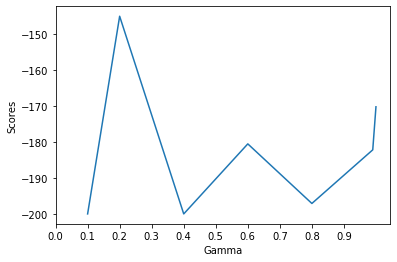

In [52]:
no_of_cases = [0.1,0.2,0.4,0.6,0.8,0.99,1]
test_scores_gammas = []
gamma =[]
for i in range(len(no_of_cases)):
    q_agent_gamma = QLearningAgent(env, state_grid,gamma=no_of_cases[i])
    scores_gamma = run(q_agent_gamma,env,num_episodes=10000) 
    test_scores_gamma = run(q_agent_gamma, env, num_episodes=100, mode='test')
    test_scores_gammas.append(np.mean(test_scores_gamma))
    gamma.append(no_of_cases[i])
    print("/n[TEST] Completed {} episodes with avg. score = {}".format(len(test_scores_gamma), np.mean(test_scores_gamma)))
    print("Gamma: "+str(no_of_cases[i])+"\tMax avg Score: "+ str(np.mean(test_scores_gamma)))
    
plt.plot(gamma,test_scores_gammas)
plt.xticks(np.arange(0, 1, 0.1))
plt.xlabel("Gamma")
plt.ylabel("Scores")
plt.show()

## Reporting the selected parameters

### Best value of Hyperparameters from the above experiments

<table style="width:50%">
    <h4 align='center'>Results</h4>
  <tr>
    <th>Hyperparameters</th>
    <th>Value</th> 
    <th> Max Average Score</th>
  </tr>
  <tr>
    <td>Learning Rate, $\alpha$</td> 
    <td>0.2</td>
    <td>-146.67</td>
  </tr>
   <tr>
    <td>Epsilon, $\epsilon$</td> 
    <td>0.2</td>
    <td>-148.59</td> 
  </tr>
   <tr>
    <td>Discount Factor, $\gamma$</td> 
    <td>0.2</td>
    <td>-145.16</td>
    
</table>

## Visualization for Mountain Car Problem



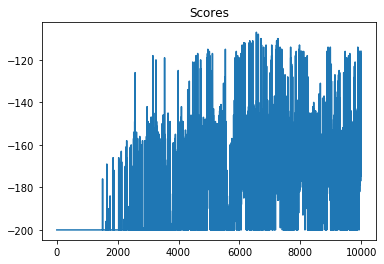

In [53]:
# Plot scores obtained per episode

plt.plot(scores); plt.title("Scores");

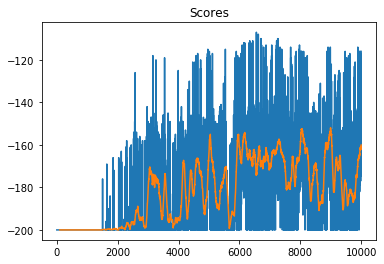

In [54]:
def plot_scores(scores, rolling_window=100):
    """Plot scores and optional rolling mean using specified window."""
    plt.plot(scores); plt.title("Scores");
    rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
    plt.plot(rolling_mean);
    return rolling_mean

rolling_mean = plot_scores(scores)

[TEST] Completed 100 episodes with avg. score = -158.39


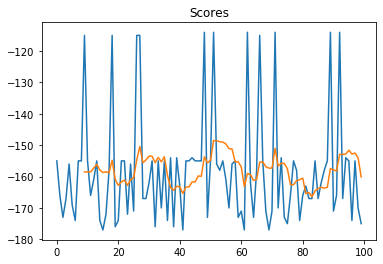

In [55]:
# Run in test mode and analyze scores obtained
test_scores = run(q_agent, env, num_episodes=100, mode='test')
print("[TEST] Completed {} episodes with avg. score = {}".format(len(test_scores), np.mean(test_scores)))
_ = plot_scores(test_scores, rolling_window=10)

## Observations and analysis of learning results and plots

We have performed the above experiments for the three hyperparameters for many different values one by one by keeping all other parameters to  their default values. Below are the hyperparameters tuned and considered for the analysis:

1. **Learning Rate(alpha):**  
2. **Discount Factor(gamma):** 
3. **Epsilon:**

For the learning rate, Discount Factor and Epsilon, we have performed the experiments for number of values ranging between 0 to 1. But, there were not much difference or improvement in our max average score in either of our case. In all the cases, our maximum average score remain close to 25% slightly up or down.  

So tuning just a single hyperparameter at a time does not yield good results. So tried tuning the model with trying all the combinations of all the  hyperparameters for different values.

**Uniform Grid**: For generating all possible combinations from all the hyperparameters, By using uniform grid and tuning with all the combinations , we are able to get the best out of that all the results.

# Conclusions

In this workbook, we get a basic understanding of reinforcement learning and how an agent learns from prior experience and uses his previous experience to decide on the next move. We have learned 2 approaches to TD learning (SARSA and Q-learning) and in one problem we prefer q-learning over the SARSA approach and in other vice versa.

### Challenges 

- The key challenge was to retain the Q-table to store the best state and action details. 
- Tuning to achieve the right hyperparameters to train the agent. 
- There were so many print comments in the run code of the sample. When I ran my tests, the size of a notebook was easily increased and it crashed. I had to work to recover my notebook and comment on the print claims.
- The tests took a long time to run because of all the possible configurations that I was trying to run to achieve the best results.

### Learnings

- I get the basic intuition behind the reinforcement learning agent from this workbook and how it works. 
- I got to know how to set the state of action and award the problem. 
- I understood how hyperparameters are tuned and how the agent's learning is controlled by hyperparameter tuning.

# References 

[1]  Steeve Huang. "Introduction to Various Reinforcement Learning Algorithms. Part I (Q-Learning, SARSA, DQN, DDPG)", Towards Data Science, Jan 12 2018,
https://towardsdatascience.com/introduction-to-various-reinforcement-learning-algorithms-i-q-learning-sarsa-dqn-ddpg-72a5e0cb6287

[2] Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science \& Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007),
https://matplotlib.org/tutorials/introductory/sample_plots.html

[3] Pranav Mahajan. "Playing Blackjack using Model-free Reinforcement Learning in Google Colab!", Towards Data Science, Jan 14 2019,
https://towardsdatascience.com/playing-blackjack-using-model-free-reinforcement-learning-in-google-colab-aa2041a2c13d

[4] "Q-learning”: From Wikipedia, the free encyclopedia, from 
https://en.wikipedia.org/wiki/Q-learning